##  Example of how to use Sonobat Guano MD to create tables ready for statistical analysis (Occupancy Modeling)


#### Between the content that is stored in the Guano MD and the content in the NABat file naming convention, nearly all the info we need is at hand.

In [1]:
from guano import GuanoFile

import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
dname = r"F:\1181"
d = Path(dname)
wavs = d.glob('**\*.wav')

In [3]:
%%time

rows = []
mds = []
for wav in wavs:
    g = GuanoFile(str(wav))
    md = dict(g.items())
    md['filepath'] = wav.parent
    md['filename'] = wav.name
    md['seconds'] = g.wav_params.nframes / g.wav_params.framerate
    mds.append(md)


Wall time: 3.42 s


### This gives us a dataframe of the Guano MD in that folder

In [4]:
df = pd.DataFrame(mds).set_index('Timestamp')
df.columns = [col.replace('|', '_').replace(' ', '_') for col in df.columns]
df['Species_Manual_ID'][df.Species_Manual_ID==''] = 'Not Vetted'
df.head(10)

C:\Anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,GUANO_Version,Length,Note,SB_Classifier,SB_Filter_HP,SB_Region,SB_Species_Auto_ID,SB_Version,Samplerate,Species_Auto_ID,Species_Manual_ID,TE,filename,filepath,seconds
Timestamp,,,,,,,,,,,,,,,
2017-07-12 21:40:55,1.0,5.0,,south Great Basin,30,Great Basin,HiF,4.2.1,192000.0,HiF,Myev,1.0,NABAT-1181NE_20170712_214055.wav,F:\1181\files_for_nabat\soundfiles,4.984000
2017-07-12 22:13:42,1.0,5.0,,south Great Basin,5,Great Basin,Myth,4.2.1,192000.0,Myth,Myth,1.0,NABAT-1181NE_20170712_221342.wav,F:\1181\files_for_nabat\soundfiles,5.004000
2017-07-12 22:17:50,1.0,5.0,,south Great Basin,5,Great Basin,noID,4.2.1,192000.0,noID,Tabr,1.0,NABAT-1181NE_20170712_221750.wav,F:\1181\files_for_nabat\soundfiles,5.004000
2017-07-12 22:17:56,1.0,4.5,,south Great Basin,5,Great Basin,Lano,4.2.1,192000.0,Lano,Lano,1.0,NABAT-1181NE_20170712_221756.wav,F:\1181\files_for_nabat\soundfiles,4.526667
2017-07-12 22:52:15,1.0,4.4,,south Great Basin,5,Great Basin,LoF,4.2.1,192000.0,LoF,Lano,1.0,NABAT-1181NE_20170712_225215.wav,F:\1181\files_for_nabat\soundfiles,4.360000
2017-07-12 23:15:30,1.0,5.0,,south Great Basin,5,Great Basin,Laci,4.2.1,192000.0,Laci,Laci,1.0,NABAT-1181NE_20170712_231530.wav,F:\1181\files_for_nabat\soundfiles,5.004000
2017-07-12 23:21:17,1.0,5.0,,south Great Basin,5,Great Basin,Lano,4.2.1,192000.0,Lano,Lano,1.0,NABAT-1181NE_20170712_232117.wav,F:\1181\files_for_nabat\soundfiles,5.004000
2017-07-12 23:30:56,1.0,5.0,,south Great Basin,5,Great Basin,Lano,4.2.1,192000.0,Lano,Lano,1.0,NABAT-1181NE_20170712_233056.wav,F:\1181\files_for_nabat\soundfiles,5.004000
2017-07-12 23:52:42,1.0,5.0,,south Great Basin,5,Great Basin,Lano,4.2.1,192000.0,Lano,Lano,1.0,NABAT-1181NE_20170712_235242.wav,F:\1181\files_for_nabat\soundfiles,5.004000


#### Not True!  We're currently only moving up the records for which we got a manual vetting confirmation of the autoid species

In [5]:
confirmed = df[~df.Species_Manual_ID.isin(['Not Vetted', 'Unconfirmed'])].dropna(subset=['Species_Manual_ID'])
confirmed.head()

,GUANO_Version,Length,Note,SB_Classifier,SB_Filter_HP,SB_Region,SB_Species_Auto_ID,SB_Version,Samplerate,Species_Auto_ID,Species_Manual_ID,TE,filename,filepath,seconds
Timestamp,,,,,,,,,,,,,,,
2017-07-12 21:40:55,1.0,5.0,,south Great Basin,30,Great Basin,HiF,4.2.1,192000.0,HiF,Myev,1.0,NABAT-1181NE_20170712_214055.wav,F:\1181\files_for_nabat\soundfiles,4.984000
2017-07-12 22:13:42,1.0,5.0,,south Great Basin,5,Great Basin,Myth,4.2.1,192000.0,Myth,Myth,1.0,NABAT-1181NE_20170712_221342.wav,F:\1181\files_for_nabat\soundfiles,5.004000
2017-07-12 22:17:50,1.0,5.0,,south Great Basin,5,Great Basin,noID,4.2.1,192000.0,noID,Tabr,1.0,NABAT-1181NE_20170712_221750.wav,F:\1181\files_for_nabat\soundfiles,5.004000
2017-07-12 22:17:56,1.0,4.5,,south Great Basin,5,Great Basin,Lano,4.2.1,192000.0,Lano,Lano,1.0,NABAT-1181NE_20170712_221756.wav,F:\1181\files_for_nabat\soundfiles,4.526667
2017-07-12 22:52:15,1.0,4.4,,south Great Basin,5,Great Basin,LoF,4.2.1,192000.0,LoF,Lano,1.0,NABAT-1181NE_20170712_225215.wav,F:\1181\files_for_nabat\soundfiles,4.360000


## A quick plot of the classification results

##### The code to plot a confusion matrix was pulled from [a user contributed Kaggle notebook], and is hidden in the cell below.
[a user contributed Kaggle notebook]: https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

In [6]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Manual vs Auto ID',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Manual Species label')
    plt.xlabel('Auto Species label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

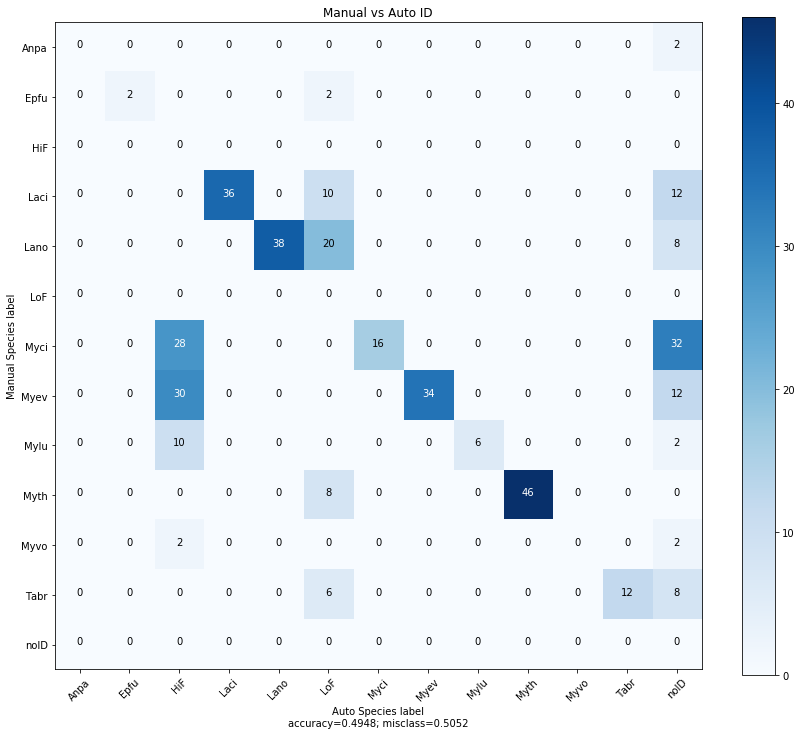

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(confirmed.Species_Manual_ID, confirmed.Species_Auto_ID)

target_names = np.unique(confirmed[['Species_Manual_ID', 'Species_Auto_ID']].values)
np.set_printoptions(precision=2)
plot_confusion_matrix(cm, target_names=target_names, normalize=False)


## Now let's convert this dataframe to the formats needed for this NABat occupancy analysis

#### A couple of helper functions we'll need...

In [8]:
from datetime import datetime, timedelta

def monitoring_night(dt):
    # return the sample night from a date time
    # if after midnight return previous date
    if dt.hour < 12:
        monitoringnight = dt.date() - timedelta(days=1)
    else:
        monitoringnight = dt.date()
        
    return monitoringnight
    

def parse_nabat_fname(fname):
    """If a file is in the format specified by NABat (grtsid_sitename_date_time.wav)
    parse it and return the components.  
    
    Allows for some discrepansies an malformations
    """
    f = Path(fname)
    name = f.stem
    if name.lower().startswith('nabat'):
        name = name[5:]
    if name.startswith('-'):
        name = name [1:]

    digit = name[0]
    grtsid = ''
    while digit.isnumeric():
        name = name [1:]
        grtsid += digit
        digit = name[0]
        
    if name.startswith('-'):
        name = name [1:]
        
    sitename, datestr, timestr = name.split('_')
    dt = datetime.strptime('T'.join([datestr, timestr]), "%Y%m%dT%H%M%S")

    
    return(grtsid, sitename, dt, monitoring_night(dt))

#### Add in columns for cell, site, filedatetime, and monitoring night based on the file names.

In [9]:

df['grtsid'], df['sitename'], df['filedatetime'], df['monitoringnight'] = zip(*df.filename.apply(parse_nabat_fname))
df.head(4)

,GUANO_Version,Length,Note,SB_Classifier,SB_Filter_HP,SB_Region,SB_Species_Auto_ID,SB_Version,Samplerate,Species_Auto_ID,Species_Manual_ID,TE,filename,filepath,seconds,grtsid,sitename,filedatetime,monitoringnight
Timestamp,,,,,,,,,,,,,,,,,,,
2017-07-12 21:40:55,1.0,5.0,,south Great Basin,30,Great Basin,HiF,4.2.1,192000.0,HiF,Myev,1.0,NABAT-1181NE_20170712_214055.wav,F:\1181\files_for_nabat\soundfiles,4.984000,1181,NE,2017-07-12 21:40:55,2017-07-12
2017-07-12 22:13:42,1.0,5.0,,south Great Basin,5,Great Basin,Myth,4.2.1,192000.0,Myth,Myth,1.0,NABAT-1181NE_20170712_221342.wav,F:\1181\files_for_nabat\soundfiles,5.004000,1181,NE,2017-07-12 22:13:42,2017-07-12
2017-07-12 22:17:50,1.0,5.0,,south Great Basin,5,Great Basin,noID,4.2.1,192000.0,noID,Tabr,1.0,NABAT-1181NE_20170712_221750.wav,F:\1181\files_for_nabat\soundfiles,5.004000,1181,NE,2017-07-12 22:17:50,2017-07-12
2017-07-12 22:17:56,1.0,4.5,,south Great Basin,5,Great Basin,Lano,4.2.1,192000.0,Lano,Lano,1.0,NABAT-1181NE_20170712_221756.wav,F:\1181\files_for_nabat\soundfiles,4.526667,1181,NE,2017-07-12 22:17:56,2017-07-12


### Table 1.  Sonobat auto ID output

In [10]:
auto = df.groupby(['grtsid', 'sitename', 'monitoringnight'])['Species_Auto_ID'].value_counts()
auto  = auto.reset_index(name='Species_Auto_ID_count', level=-1)
auto.Species_Auto_ID = auto.Species_Auto_ID.replace('', '_blank')
auto_id_counts = auto.pivot(columns='Species_Auto_ID').replace(np.nan, '0')
auto_id_counts.to_csv(r"C:\temp\table1_1181_2017.csv")
auto_id_counts

Species_Auto_ID_count                          \
Species_Auto_ID                                  Anpa Epfu HiF HiLo Labl Laci   
grtsid sitename monitoringnight                                                 
1181   NE       2017-07-12                          0    0   2    0    0   15   
                2017-07-13                          1   21   3    0    0   17   
                2017-07-14                          0   21   7    0    0    7   
                2017-07-15                          0    4   8    0    0    3   
                2017-07-16                          0    3   2    0    0   20   
                2017-07-17                          0    5  14    0    0    8   
                2017-07-18                          0    1   2    0    0    2   
       NW       2017-07-12                          0    3  10    0    0   36   
                2017-07-13                          2   34   4    1    0    3   
                2017-07-14                          0    9  13    0    0   11   
                2017-07-15                          0    6   0    0    0    3   
                2017-07-16                          0    0   0    0    0    0   
                2017-07-17                          0    0  15    0    0    3   
                2017-07-18                          0    9   8    0    0    1   
       SE       2017-07-12                          0    7  12    0    0    3   
                2017-07-13                          0    0   8    0    1    1   
                2017-07-14                          0    5   8    0    0    3   
                2017-07-15                          0    8  16    0    0    3   
                2017-07-16                          0    2   2    0    0    0   
                2017-07-17                          0    4   8    0    0    1   
                2017-07-18                          0    5   7    0    0    4   
       SW       2017-07-12                          0    0   1    0    0    1   
                2017-07-13                          0    0   3    0    0    0   
                2017-07-14                          0    0   1    0    0    3   
                2017-07-15                          0    0   4    0    0    0   
                2017-07-16                          0    0   6    0    0    1   
                2017-07-17                          0    0   2    0    0    1   
                2017-07-18                          0    0  12    0    0    0   

                                                                             \
Species_Auto_ID                 Lano LoF Myca Myci Myev Mylu Myth Myvo Tabr   
grtsid sitename monitoringnight                                               
1181   NE       2017-07-12        12  20    0    0    3    0    3    0    6   
                2017-07-13         1  37    0    0    4    0    0    0   10   
                2017-07-14         6  15    0    7    3    1    2    0    4   
                2017-07-15         1  12    0    0    0    0    7    0    3   
                2017-07-16         0  31    0    0    0    0   11    0    4   
                2017-07-17         7  18    0    4    5    0   14    0    0   
                2017-07-18         4  16    0    0    4    0   20    0    3   
       NW       2017-07-12         1  16    0    0    2    0    0    0    1   
                2017-07-13         0  26    0    0    7    0    0    0   28   
                2017-07-14         0  13    0    2    4    0    0    0    3   
                2017-07-15         0   2    0    0    0    0    0    0    2   
                2017-07-16         0   1    0    0    2    1    0    0    0   
                2017-07-17         0   6    0    0    2    0    0    0    1   
                2017-07-18         0   6    0    0    7    0    0    0    1   
       SE       2017-07-12        17  34    0    0    5    0    2    0   27   
                2017-07-13        19  22    0    0    1    0    3    0    4   
                201

### Table 2 Sonobat auto id output joined to manually vetted classifications (Truth)

In [11]:
auto_ = df.groupby(['grtsid', 'sitename', 'monitoringnight', 'Species_Manual_ID'])['Species_Auto_ID'].value_counts()
auto_  = auto_.reset_index(name='Species_Auto_ID_count', level=-1)
auto_.Species_Auto_ID = auto_.Species_Auto_ID.replace('', '_blank')
auto_id_counts_ = auto_.pivot(columns='Species_Auto_ID').replace(np.nan, '0')

manual = df.groupby(['grtsid', 'sitename', 'monitoringnight'])['Species_Manual_ID'].value_counts()
manual  = manual.reset_index(name='Species_Manual_ID_count', level=-1)
manual.Species_Manual_ID = manual.Species_Manual_ID.replace('', '_blank')

manual = manual.set_index(['Species_Manual_ID'], append=True)
manual
table2 = pd.concat([manual, auto_id_counts_], axis=1)
table2.to_csv(r"C:\temp\table2_1181_2017.csv")
table2

Species_Manual_ID_count  \
grtsid sitename monitoringnight Species_Manual_ID                            
1181   NE       2017-07-12      Laci                                     2   
                                Lano                                    10   
                                Myev                                     4   
                                Myth                                     2   
                                Not Vetted                             183   
                                Tabr                                     6   
                                Unconfirmed                             42   
                2017-07-13      Laci                                     2   
                                Lano                                     4   
                                Myev                                     2   
                                Not Vetted                             307   
                                Tabr                                     6   
                                Unconfirmed                             91   
                2017-07-14      Laci                                     6   
                                Lano                                     6   
                                Myci                                    10   
                                Myev                                     6   
                                Myth                                     4   
                                Not Vetted                              95   
                                Unconfirmed                             61   
                2017-07-15      Epfu                                     2   
                                Laci                                     4   
                                Myci                                     8   
                                Myth                                    10   
                                Not Vetted                              63   
                                Tabr                                     2   
                                Unconfirmed                             24   
                2017-07-16      Laci                                     2   
                                Lano                                     2   
                                Myci                                     6   
...                                                                    ...   
       SE       2017-07-17      Not Vetted                              41   
                                Unconfirmed                             35   
                2017-07-18      Laci                                     4   
                                Lano                                     2   
                                Myev                                     2   
                                Not Vetted                              26   
                                Unconfirmed                             35   
       SW       2017-07-12      Lano                                     4   
                                Myci                                     2   
                                Not Vetted                              85   
                                Unconfirmed                             12   
                2017-07-13      Not Vetted                              56   
                                Unconfirmed                             12   
                2017-07-14      Not Vetted                              71   
                                Unconfirmed                             15   
                2017-07-15      Myci                                     2   
                                Mylu                                     2   
                                Not Vetted                              40   
                                Unconfirmed                             1